# Laboratorio 3: Clasificación



Integrantes: Patricio Espinoza Acuña (Sec. 2); Vicente Thiele M. (Sec. 2)

## Declaración de compromiso ético

Nosotros/as Patricio Espinoza A. y Vicente Thiele M., declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.

## Instrucciones

1. Trabajen en equipos de dos personas.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. El formato de entrega para esta actividad es un archivo **html**. Genere un archivo HTML usando jupyter y súbalo a U-Cursos. Basta con que **uno de los integrantes haga la entrega**. Si ambos hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


A continuación vamos a cargar un dataset con noticias, el cual se puede encontrar en: https://www.kaggle.com/datasets/kevinmorgado/spanish-news-classification.

Los atributos que posee son:

- URL : El link a la noticia
- News: El texto de la noticia
- Type: La clasificación de la noticia


Para el laboratoria solo nos importan las columnas News y Type.


In [9]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab2.1/noticias.csv")
df = df[["news", "Type"]]
df = df.rename(columns={
    'news': 'Noticia', 'Type':'Clasificación'})
df.head()


,Noticia,Clasificación
0,Durante el foro La banca articulador empresari...,Otra
1,El regulador de valores de China dijo el domin...,Regulaciones
2,En una industria históricamente masculina como...,Alianzas
3,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,Ayer en Cartagena se dio inicio a la versión n...,Otra


A continuación preprocesaremos los textos y los convertiremos en vectores. Esto con el propósito de tener información numérica que pueda ser interpretable por los modelos que crearemos después.


In [10]:
import requests
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

def remove_numbers(text):
    text = re.sub(r"[0-9]", " ", text)
    return " ".join(text.split())

def remove_unprintable_(text):
    printable = set(string.printable + "ñáéíóúü" + "ÑÁÉÍÓÚÜ")
    text = "".join(filter(lambda x: x in printable, text))
    return text

def remove_punctuation(text):
    pattern = re.compile(r"[^\w\sáéíóúüñÁÉÍÓÚÜÑ]")
    t = pattern.sub(r" ", text)
    return re.sub(" +", " ", t)

def reduce_spam(text):
    text = re.sub(r"(\w+)(\s+\1){2,}", r"\1", text)
    text = re.sub(r"(\w+\s+\w+)(\s+\1){2,}", r"\1", text)
    return text

def remove_vowels_accents(text):
    return (
        text.replace("á", "a")
        .replace("é", "e")
        .replace("í", "i")
        .replace("ó", "o")
        .replace("ú", "u")
        .replace("ü", "u")
    )

def remove_stopwords(text, stopwords_list):
    return " ".join(
        [word for word in str(text).split() if word not in stopwords_list]
    )

url = "https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt"
r = requests.get(url)

stopwords_list = r.text.splitlines()

def preprocesar(text):
    text = text.lower()
    text = remove_numbers(text)
    text = remove_unprintable_(text)
    text = remove_punctuation(text)
    text = reduce_spam(text)
    text = remove_stopwords(text, stopwords_list)
    text = remove_vowels_accents(text)
    return text.strip()


# Extraer los vectores
vectorizer = CountVectorizer(preprocessor=preprocesar, min_df=2)
vectors = vectorizer.fit_transform(df["Noticia"])

# Incorporar los vectores como dataframe
X = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
y = df["Clasificación"]

df_vectorizado = pd.concat([y, X], axis=1)
df_vectorizado.head()


,Clasificación,aa,aaa,abacum,abajo,abandonar,abandono,abanico,abaratamiento,abaratar,...,zero,zhao,zijin,zmvm,zona,zonas,zuckerberg,zug,zuluaga,zurich
0,Otra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Regulaciones,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alianzas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Macroeconomia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Otra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Pregunta 1

Cargue los datos e indique lo siguiente:

- Tamaño del dataset vectorizado (cantidad de instancias y atributos).
- ¿Cuántas clases hay en la columna "Clasificación" y cuáles son sus nombres?
- ¿Cuántas instancias hay en cada clase?

Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.


In [11]:
#Respuesta
size = df_vectorizado.shape
print("Instancias: ", size[0], "Atributos: ", size[1])
# Clases en la columna "Clasificacion"
clases = df_vectorizado["Clasificación"].unique()
print("Clases: ", clases)
# Cantidad de instancias por clase
for clase in clases:
    print(clase, ":", df_vectorizado[df_vectorizado["Clasificación"] == clase].shape[0])

Instancias:  1217 Atributos:  14407
Clases:  ['Otra' 'Regulaciones' 'Alianzas' 'Macroeconomia' 'Innovacion'
 'Sostenibilidad' 'Reputacion']
Otra : 130
Regulaciones : 142
Alianzas : 247
Macroeconomia : 340
Innovacion : 195
Sostenibilidad : 137
Reputacion : 26


### Pregunta 2


En esta parte useremos el clasificador **Naive Bayes**. Veremos distintas formas de usarlo, y vamos a compararlas utilizando diversas métricas.


Usando el siguiente código, entrenaremos un clasificador con los datos cargados (X, y) y haremos una predicción sobre los mismos datos empleando dicho clasificador entrenado. Luego, se mostrarán las métricas de **accuracy**, **precision**, **recall** y **f1-score**.


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

clf = GaussianNB()
clf.fit(X, y)
y_pred = clf.predict(X)

print(classification_report(y, y_pred))

                precision    recall  f1-score   support

      Alianzas       1.00      0.99      0.99       247
    Innovacion       1.00      1.00      1.00       195
 Macroeconomia       1.00      0.99      1.00       340
          Otra       0.98      1.00      0.99       130
  Regulaciones       0.99      1.00      1.00       142
    Reputacion       0.87      1.00      0.93        26
Sostenibilidad       1.00      0.99      1.00       137

      accuracy                           0.99      1217
     macro avg       0.98      1.00      0.99      1217
  weighted avg       0.99      0.99      0.99      1217



De acuerdo a los resultados obtenidos:

- ¿Qué opina sobre las predicciones?
En todas las clases a excepción de "Reputación" la precisión (casos seleccionados que son correctos) se encuentra sobre 0,9.
Además para el recall se obtienen valores altos para cada clase, lo que puede indicar que el modelo clasifica muy bien, entregando pocos falsos negativos en comparación de los verdaderos positivos, sin embargo esto puede estar sesgado si el modelo entrega una gran cantidad de falsos positivos. (Un modelo que solo entrega resultados positivos (TP & FP) podria burlar la métrica recall)

- ¿Qué problema puede identificar?
La clase "Reputación" es la que tiene precision y f1-score más bajos (F1-score depende de precision), y coincide que la cantidad de datos (support) es de 26, lo que puede significar que no hay suficiente data para el entrenamiento de dicha clase. Esto también se puede observar al notar que la siguiente clase con menos frecuencia es "Otra" con 130 objetos, y cuya precision es la segunda más baja con 0.98, notando así, que a medida que se incrementan los objetos para cada clase, sus medidas de precisión aumentan, lo que esta relacionado a que no hay un sesgo provocado por falta de datos al momento de clasificar.


**Respuesta:**



### Pregunta 3


Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (**_training set_**) y 30% para testear (**_testing set_**). Use la función **_train_test_split()_** de _sklearn_ y utilice las variables `X_train, X_test, y_train, y_test`.


Escriba el código necesario para dividir los datos, entrenar el modelo e indicar el **accuracy**, **precision** y **recall** del clasificador.

Entrene usando el **_training set_** y pruebe sobre el **_testing set_**, en base a la división 70%-30%, respectivamente

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**


In [13]:
from sklearn.model_selection import train_test_split
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=39, stratify=y)
# Entrenar el modelo
nb_clf = GaussianNB()

nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

      Alianzas       0.63      0.66      0.64        74
    Innovacion       0.71      0.97      0.82        59
 Macroeconomia       0.78      0.93      0.85       102
          Otra       0.93      0.33      0.49        39
  Regulaciones       0.81      0.51      0.63        43
    Reputacion       0.60      0.38      0.46         8
Sostenibilidad       0.85      0.83      0.84        41

      accuracy                           0.75       366
     macro avg       0.76      0.66      0.68       366
  weighted avg       0.76      0.75      0.73       366



¿Qué opina sobre las predicciones obtenidas en la pregunta anterior?

Son predicciones realistas que demuestran la capacidad de generalizar del modelo frente a datos no vistos.

Responda lo siguiente:

- Comparando los clasificadores de las preguntas 2 y 3 ¿Cuál tiene peores resultados? ¿Por qué?

El clasificador obtenido en la pregunta 3 presento peores resultados para todas las métricas usadas, esto se debe a que a diferencia del clasificador de la pregunta 2 no se entrena con todo el dataset (en la P3 solo el 30%), lo que genera que hayan menos datos (support) para el entrenamiento y por ende variedad de datos para una clase determinada.

- ¿Cuál de las dos formas de entrenar el clasificador prefiere? Justifique su respuesta

La clasificación realizada en la pregunta 3, esto ya que realmente se hace un proceso de entrenamiento para el modelo el cual luego deberá intentar clasificar correctamente datos no vistos, indicando la capacidad de generalizar del modelo, concepto que es clave al momento de construir un modelo.
Además, para la pregunta 2 ocurre que se entrena y clasifica sobre el mismo dataset, lo que lleva que exista overfitting.
Uno mejora considerable para la pregunta 3 es realizar k-iteraciones variando los datos de training y testing (epocas), lo que aumentaria la cantidad de informacion obtenida por cada clase y mejoraria la capacidad de generalizar del modelo, siempre y cuando no se llegue al punto de overfitting.

**Respuesta:**


### Pregunta 4

Grafique una matriz de confusión para los resultados de clasificación de la pregunta anterior. Interprete la matriz y comente sobre cada uno de los valores distintos de 0 en la matriz y describa lo que representa.

_Verifique que los resultados que se imprimen concuerden con su respuesta._


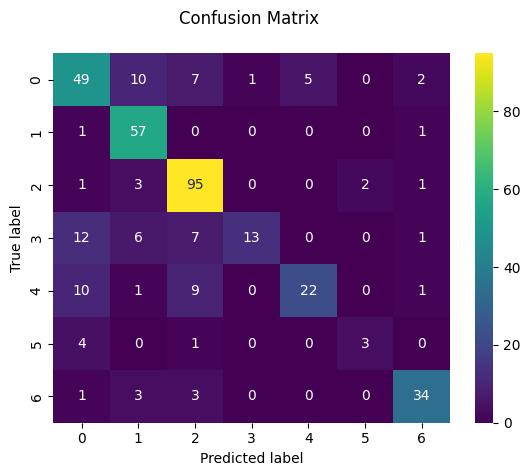

[Text(0.5, 0, 'clase 1'),
 Text(1.5, 0, 'clase 2'),
 Text(2.5, 0, 'clase 3'),
 Text(3.5, 0, 'clase 4'),
 Text(4.5, 0, 'clase 5'),
 Text(5.5, 0, 'clase 6'),
 Text(6.5, 0, 'clase 7')]

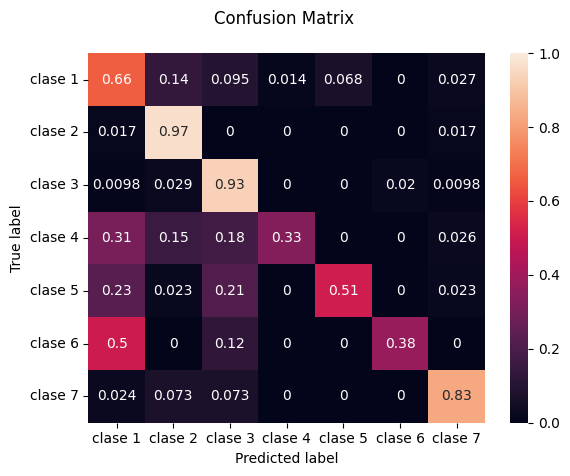

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

classes = unique_labels(y_test, y_pred)


# Escriba el código necesario para generar la matriz
cm = confusion_matrix(y_test, y_pred) # calcula valores de la matriz de confusión

fig, ax = plt.subplots()
ax = sns.heatmap(cm, annot=True, cmap="viridis") # transforma la matriz en un heatmap para su visualización
ax.set_title('Confusion Matrix \n')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

plt.show()

# Matriz de confusión normalizada
cm = confusion_matrix(y_test, y_pred, normalize='true')
fig, ax = plt.subplots()
ax = sns.heatmap(cm, annot=True, vmin=0, vmax=1)

ax.set_title('Confusion Matrix \n')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

class_labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4', 'clase 5', 'clase 6', 'clase 7']
ax.set_yticklabels(class_labels, rotation=0)
ax.set_xticklabels(class_labels)

**Respuesta:**

A partir de la pregunta 3 sabemos que la cantidad máxima de instancias para una clase es de 102. En la matriz de confusión a medida que aumenta la frecuencia de instancias clasificadas para una clase, el color pasa de azul marino a verde y posteriormente a amarillo.

Con respecto a la matriz obtenida, la diagonal representa los Verdaderos Positivos y los Verdaderos Negativos, mientras que las celdas alrededor representan a los Falsos Positivos y Falsos Negativos. En particular se observa que la concetración de datos se encuentra en la diagonal, indicando que el modelo tiende a clasificar correctamente los datos, lo cual coincide con los resultados de las métricas obtenidas, en donde si bien el resultado es menor al de las métricas en la P2, gran parte de las clases obtuvieron buenos resultados, con un resultado de accuracy de 0,75.

Sin embargo, se debe tener en consideración la cantidad de datos por clase, la primera matriz de confusión resalta los resultados con frecuencias altas respecto a la freq. máxima sin tener en consideración las frecuencias individuales por clase, por eso, en la segunda matriz de confusión es posible observar que existen datos correspondientes a Falsos Negativos con un alto valor obtenido. Para la parte de la matriz correspondiente a Falsos Positivos también es posible notar en ambas matrices que la cantidad es mucho menor en comparacion a los Falsos Positivos.

### Pregunta 5

Para este clasificador utilizaremos Cross-validation. Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation. Una forma de estimar el rendimiento del clasificador es, entre otras cosas, calculando el promedio de todos los k-folds.

Escriba un código que ejecute 10-fold cross-validation usando Naive Bayes sobre los datos, evaluando las métricas: 'precision_macro', 'recall_macro', 'accuracy', 'f1_macro'.


In [15]:
from sklearn.model_selection import cross_validate
import numpy as np

# Escriba su código aquí
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
clf = GaussianNB()
clf.fit(X, y)
cv_results = cross_validate(clf, X_train, y_train, cv=10, scoring=scoring)#, return_train_score=True) #scoring= precision_macro, recall_macro, accuracy, f1_macro
# Imprimir los resultados
print("Precision Macro: ", np.mean(cv_results['test_precision_macro']))
print("Recall Macro: ", np.mean(cv_results['test_recall_macro']))
print("Accuracy: ", np.mean(cv_results['test_accuracy']))
print("F1 Macro: ", np.mean(cv_results['test_f1_macro']))

c:\Users\pbast\Desktop\python-envs\labs\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pbast\Desktop\python-envs\labs\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pbast\Desktop\python-envs\labs\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Precision Macro:  0.6036441417937788
Recall Macro:  0.5755252959600786
Accuracy:  0.6910259917920657
F1 Macro:  0.5652282536748119


- Compare los valores de las métricas con respecto a lo obtenido en la pregunta 3. Comente en qué difieren y por qué.

Tenemos la siguiente tabla comparativa de resultados:

| macro   | precision | recall | f1-score | accuracy |
|---------|-----------|--------|----------|----------|
| P5      | 0.60      | 0.57   | 0.56     | 0.69     |
| P3      | 0.76      | 0.66   | 0.68     | 0.75     |


Comparando los resultados obtenidos con los de la P3 nos damos cuenta que nuestras métricas fueron menores en todos los casos. Una razón por la que esto puede ocurrir es que pese a realizar k veces el proceso, el dividir en k-conjuntos la data de entrenamiento se vuelve aún más pequeña, lo que impide que el modelo aprenda un patrón para asignar correctamente una clase, lo que a su vez genera que para los datos correspondientes al conjunto de prueba en cada iteración no haya una buena generalización de parte del modelo al intentar clasificarlo. 

- ¿Qué beneficios tiene emplear cross-validation?

Los beneficios de emplear cross-validation son:
- Evitar overfitting al dividir la data en múltiples conjuntos de entrenamiento y testing.
- Mayor robustez en el modelo al realizar multiples entrenamientos y pruebas con particiones de datos.
- Métricas más acertadas sobre el comportamiento del modelo al ser probado más veces y obtener el promedio de cada una.



**Respuesta:**


### Pregunta 6

Entrene otro clasificador distinto de Naive Bayes a su elección y evalue sus resultados de la forma que estime conveniente. Luego responda las siguentes preguntas:

- ¿En qué se diferencian ambos clasificadores? Considere tanto los resultados como los propios algoritmos
- ¿Cuál de los dos clasificadores le parece que es la mejor opción? Justifique su respuesta



In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
kn_clf = KNeighborsClassifier(n_neighbors=5)

kn_clf.fit(X_train, y_train)

y_pred = kn_clf.predict(X_test)

kn_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

      Alianzas       0.61      0.15      0.24        74
    Innovacion       0.35      0.92      0.50        59
 Macroeconomia       0.73      0.89      0.80       102
          Otra       0.58      0.36      0.44        39
  Regulaciones       1.00      0.07      0.13        43
    Reputacion       1.00      0.25      0.40         8
Sostenibilidad       0.32      0.29      0.30        41

      accuracy                           0.51       366
     macro avg       0.65      0.42      0.40       366
  weighted avg       0.62      0.51      0.46       366



**Respuesta:**

En cuanto a los algoritmos de cada modelo tenemos que Naive Bayes es un clasificador basado en la relación probabilística entre atributos y las clases, mientras que KNN es un clasificador basado en instancias, usando los k puntos más cercanos para asignar etiquetas.

Por otro lado, en cuanto a los resultados obtenidos tenemos que 

| macro   | precision | recall | f1-score | accuracy |
|---------|-----------|--------|----------|----------|
| P6      | 0.65      | 0.42   | 0.40     | 0.41     |
| P3      | 0.76      | 0.66   | 0.68     | 0.75     |


Observamos que Naive Bayes es un modelo mucho mejor en tdoas las métricas comparadas a nivel macro en comparación a KNN para k=5.
En base a estos resultados se puede decir que el fuerte del modelo KNN es su precision, lo que tiene sentido pues tomará aquellas instancias similares cercanas. Sin embargo para las otras métricas su fiabilidad disminuye notablemente debido a esto mismo, al basarse solo en la distancia le es imposible generalizar y ampliar el modelo a nuevos datos.

El clasificador Naive Bayes resulta ser un clasificador mucho más fiable que KNN, también más complejo, pero que sin duda permite generalizar y ampliar el modelo, que es clave al momento de querer tener certeza y fiabilidad para etiquetar datos en base a un algoritmo. La razón de esto es su método de funcionamiento, basado en relacionar probabilisticamente los atributos con las clases.


### Pregunta 7

Cuando hacemos clasificación en Data Mining queremos encontrar un patrón en los datos. Analice los atributos de los datos junto a los resultados obtenidos en la pregunta anteriores y describa sus principales observaciones. ¿Cómo se relacionan los atributos X con la clase de interés y? Es una pregunta abierta, puede apoyar su análisis con tablas y/o visualizaciones.

**Respuesta:**

En base a KNN podemos decir que los atributos tienden a cumplir que siendo cercanos perteneceran a la misma clase (basado en la precisión). La tabla obtenida fue:

| Clase          | Precision |    Recall    |   F1 - Score  | Support |
|----------------|-----------|--------------|---------------|---------|
| Alianzas       | 0.61      | 0.15         | 0.24          | 74      |
| Innovacion     | 0.35      | 0.92         | 0.50          | 59      |
| Macroeconomia  | 0.73      | 0.89         | 0.80          | 102     |
| Otra           | 0.58      | 0.36         | 0.44          | 39      |
| Regulaciones   | 1.00      | 0.07         | 0.13          | 43      |
| Reputacion     | 1.00      | 0.25         | 0.40          | 8       |
| Sostenibilidad | 0.32      | 0.29         | 0.30          | 41      |


Dentro de las 7 clases, 5 tuvieron valores sobre 0,5 en precision, mientras que 3 en recall (métrica que considera los positivos dentro de los seleccionados).

Por otra parte, mediante Naive Bayes podemos analizar aún más que tal es la relación entre atributos y clases, pues esta es la base del modelo. La tabla obtenida fue:

| Clase          | Precision |    Recall    |   F1 - Score  | Support |
|----------------|-----------|--------------|---------------|---------|
| Alianzas       | 0.63      | 0.66         | 0.64          | 74      |
| Innovacion     | 0.71      | 0.97         | 0.82          | 59      |
| Macroeconomia  | 0.78      | 0.93         | 0.85          | 102     |
| Otra           | 0.93      | 0.33         | 0.49          | 39      |
| Regulaciones   | 0.81      | 0.51         | 0.63          | 43      |
| Reputacion     | 0.60      | 0.38         | 0.46          | 8       |
| Sostenibilidad | 0.85      | 0.83         | 0.84          | 41  

Para presición todas se encuentran sobre 0,5 y además, el mínimo es 0,60 mientras que el máximo es 0,93. Esto de por si indica que las predicciones suelen ser acertadas, y que por ende existe una relación atributo/clase en la cual se esta trabajando.

Para Recall el mínimo fue de 0,33 para la clase "Otra", y 0,38 para "Reputación" indicando que el modelo no es capaz de etiquetar la mayoría de las intancias revelantes para estas clases, sin embargo, para el resto de clases el mínimo es de 0,51 con un máximo de 0,97, indicando una buena identificación de clase para dichas instancias. 

Finalmennte de F1-score obtenemos el equilibrio entre ambas métricas, siendo las mínimas "Otra" y "Reputacion" con 0,49 y 0,46 respectivamente, indicando un mal balance entre estas métricas, y por ende, la relación atributo/clase. Para el resto de clases el mínimo es 0,63, indicando un buen balance y buena relación atributo/clase.
